<a href="https://colab.research.google.com/github/A-l-E-v/ML-Engineer/blob/main/request_3_5_%D0%BA%D0%BE%D0%BD%D1%81%D0%BF%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Парсинг веб-сайтов

# Часть 1. Парсинг одной страницы

### Введение

In [ ]:
# Импортируем необходимые библиотеки
import requests
import pandas as pd

В данном уроке мы будем парсить cписок станций Московского метрополитена с Википедии:   
https://ru.wikipedia.org/wiki/Список_станций_Московского_метрополитена

In [ ]:
# Отправим get-запрос и получим код страницы
wiki_url = "https://ru.wikipedia.org/wiki/Список_станций_Московского_метрополитена"
response = requests.get(wiki_url)
response.status_code

200

In [ ]:
# Извлекаем текстовое содержимое ответа (кода страницы) после выполнения GET-запроса
response.text

Выглядит устрашающе. Достать вручную данные из этой мешанины чистые данные очень сложно.  
Чтобы решить проблему, используем библиотеку **BeautifulSoup** (от англ. beautiful soup, «красивый суп»). Имя библиотеки выбрано как оммаж на жаргонное выражение tag soup (англ. «суп из тегов») - так называют неструктурированный, небрежно написанный код веб-страницы.
Методы библиотеки BeautifulSoup превращают HTML-файл в древовидную структуру, что-то вроде многоуровненого словаря. После этого нужный контент можно отыскать по тегам и атрибутам.
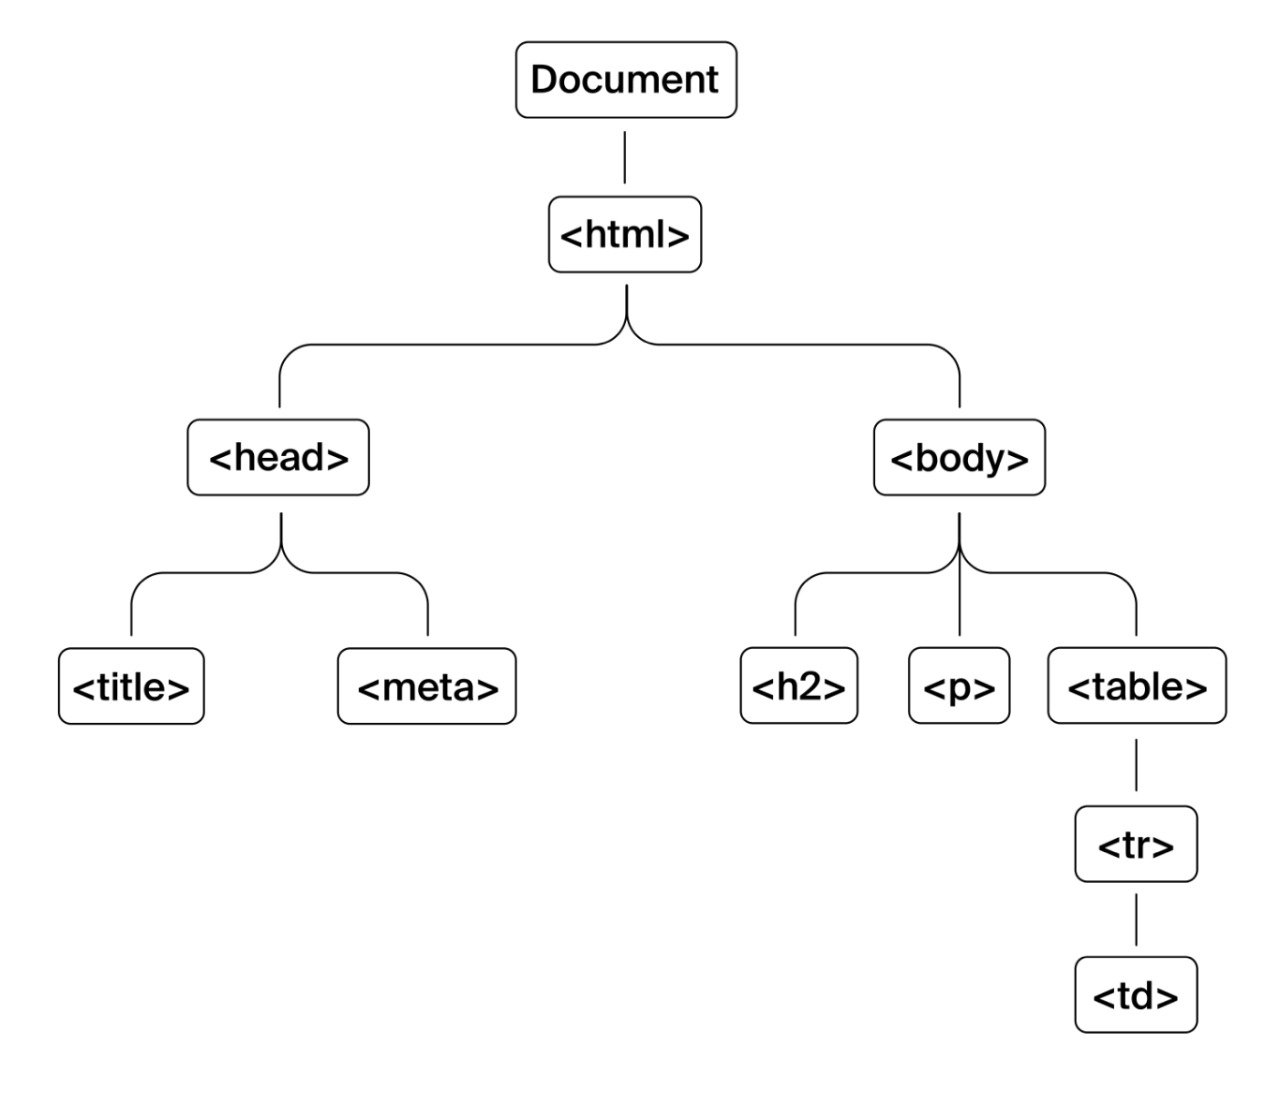

In [ ]:
# Импортируем библиотеку и создадим объект BeautifulSoup:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text, 'lxml')

Первый аргумент (**response.text**) — это данные, из которых будет собираться древовидная структура, в нашем случае - это ответ сервера.  
Второй аргумент (**'lxml'**) — синтаксический анализатор, или парсер. Он отвечает за то, как именно из кода веб-страницы получается «дерево». Парсеров много, они создают разные структуры из одного и того же HTML-документа. Мы выбрали анализатор lxml, так как он обладает высокой скоростью работы. Есть и другие, например, html.parser, xml или html5lib.

### Простой поиск по содержимому

Мы превратили код в дерево. Время извлекать данные.
Первый метод поиска называется find() (англ. «найти»). В HTML-документе он находит **первый встреченный** элемент, имя которого ему передали в качестве аргумента, и возвращает его весь, с тегами и контентом.  

In [ ]:
# Найдём заголовок первого уровня
soup.find('h1')

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">Список станций Московского метрополитена</span></h1>

In [ ]:
# чтобы вывести контент без сопроводительной мета информации применяют метод text
soup.find('h1').text

'Список станций Московского метрополитена'

In [ ]:
# обращаться к контенту можно и так
soup.h1.text

'Список станций Московского метрополитена'

Существует и другой метод поиска — find_all (англ. «найти всё»). В отличие от предыдущего метода, find_all() находит **все** вхождения определённого элемента в HTML-документе и возвращает список.

In [ ]:
# Найдём первый заголовок второго уровня
soup.find('h2')

<h2 id="mw-toc-heading">Содержание</h2>

In [ ]:
# Найдём все заголовки второго уровня
soup.find_all('h2')

[<h2 id="mw-toc-heading">Содержание</h2>,
 <h2><span id=".D0.A1.D1.82.D0.B0.D0.BD.D1.86.D0.B8.D0.B8_.D0.9C.D0.BE.D1.81.D0.BA.D0.BE.D0.B2.D1.81.D0.BA.D0.BE.D0.B3.D0.BE_.D0.BC.D0.B5.D1.82.D1.80.D0.BE.D0.BF.D0.BE.D0.BB.D0.B8.D1.82.D0.B5.D0.BD.D0.B0"></span><span class="mw-headline" id="Станции_Московского_метрополитена">Станции Московского метрополитена</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a class="mw-editsection-visualeditor" href="/w/index.php?title=%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%BF%D0%BE%D0%BB%D0%B8%D1%82%D0%B5%D0%BD%D0%B0&amp;veaction=edit&amp;section=1" title="Редактировать раздел «Станции Московского метрополитена»">править</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%B9_%D0%9C%D0%BE%

In [ ]:
# выведем только текст
for heading in soup.find_all('h2'):
    print(heading.text)

Содержание
Станции Московского метрополитена[править | править код]
Станции Московского монорельса[править | править код]
Платформы Московского центрального кольца[править | править код]
График роста количества станций[править | править код]
Строящиеся и планируемые станции[править | править код]
Недостроенные, закрытые, а также достраивавшиеся и закрывавшиеся станции[править | править код]
Примечания[править | править код]
Ссылки[править | править код]
Навигация


Видим много мусора. Чтобы от него избавиться, придется заглянуть в панель разработчика.

In [ ]:
# Попроубем вывести только необходимые спаны
for heading in soup.find_all('h2'):
    print(heading.find_all('span')[1])

IndexError: list index out of range

In [ ]:
#  Сделаем тоже самое, но с учетом ошибки
for heading in soup.find_all('h2'):
    span_list = heading.find_all('span')
    if len(span_list) >= 2 :
        print(span_list[1].text)

Станции Московского метрополитена
Станции Московского монорельса
Платформы Московского центрального кольца
График роста количества станций
Строящиеся и планируемые станции
Недостроенные, закрытые, а также достраивавшиеся и закрывавшиеся станции
Примечания
Ссылки


### Поиск с атрибутами

У методов find() и find_all() есть дополнительный фильтр для поиска элементов страницы — параметр attrs («атрибуты).
Обычно в него передают идентификаторы (id) и классы (class). Точные наименования надо смотреть в панели разработчика.

Попробуем достать навигационную таблицу, которая в коде имеет такой тег с атрибутами   
```<table class="vertical-navbox noprint ts-Боковая_навигационная_таблица-body" style="" data-name="Московский метрополитен">```

In [ ]:
# Получим таблицу, указав класс
table = soup.find('table', attrs={'class': 'vertical-navbox noprint ts-Боковая_навигационная_таблица-body'})
print(table.text)

 Московский метрополитен 
ГУП «Московский метрополитен»
Московский монорельс
Московское центральное кольцо
Московские центральные диаметры
Метро-2


История
Программа развития
В филателии
Хронология
Логотип
Оплата проезда

Аварии и теракты

Список станций
Список переименованных станций
Список пусковых участков и новых станций
Список строящихся и планируемых станций
Непостроенные станции


Подвижной состав
Именные поезда

Список эскалаторов

Особенности оформления


 


 Интерактивная схемаi






полноэкранная схема со станциями

Схема Московского метрополитена




In [ ]:
# Получим эту же таблицу, указав другой атрибут
table = soup.find('table', attrs={'data-name': 'Московский метрополитен'})
print(table.text)

 Московский метрополитен 
ГУП «Московский метрополитен»
Московский монорельс
Московское центральное кольцо
Московские центральные диаметры
Метро-2


История
Программа развития
В филателии
Хронология
Логотип
Оплата проезда

Аварии и теракты

Список станций
Список переименованных станций
Список пусковых участков и новых станций
Список строящихся и планируемых станций
Непостроенные станции


Подвижной состав
Именные поезда

Список эскалаторов

Особенности оформления


 


 Интерактивная схемаi






полноэкранная схема со станциями

Схема Московского метрополитена




In [ ]:
# Получим эту же таблицу, указав все сразу
table = soup.find('table', attrs={'class': 'vertical-navbox noprint ts-Боковая_навигационная_таблица-body', 'data-name': 'Московский метрополитен'})
print(table.text)

 Московский метрополитен 
ГУП «Московский метрополитен»
Московский монорельс
Московское центральное кольцо
Московские центральные диаметры
Метро-2


История
Программа развития
В филателии
Хронология
Логотип
Оплата проезда

Аварии и теракты

Список станций
Список переименованных станций
Список пусковых участков и новых станций
Список строящихся и планируемых станций
Непостроенные станции


Подвижной состав
Именные поезда

Список эскалаторов

Особенности оформления


 


 Интерактивная схемаi






полноэкранная схема со станциями

Схема Московского метрополитена




### Парсинг таблицы

Распарсим таблицу со списком станций метро.

In [ ]:
# Распарсим таблицу со списком станций метро
table = soup.find('table', attrs={'class': 'standard sortable jquery-tablesorter'})
table

Результат пустой. Возможно это потому что, в классе указана скриптовая часть jquery-tablesorter

In [ ]:
# уберем jquery-tablesorter
table = soup.find('table', attrs={'class': 'standard sortable'})
table

<table class="standard sortable" style="text-align:center">
<caption><small>Список может быть отсортирован по названиям станций в алфавитном порядке, а также по их характеристикам. Интерактивную карту можно вызвать нажатием на ссылку в графе «Координаты».</small>
</caption>
<tbody><tr>
<th>
</th>
<th>Название станции<br/><span style="font-size:85%;">Прежние названия</span>
</th>
<th>Дата<br/>открытия
</th>
<th>Пере-<br/>садки
</th>
<th data-sort-type="number">Глубина,<br/>м<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Тип конструкции
</th>
<th class="unsortable">Координаты
</th>
<th class="unsortable">Вид станции
</th></tr>
<tr>
<td data-sort-value="1" style="background:#EF161E"><span class="sortkey" style="display:none">01</span><span title="Сокольническая линия"><span typeof="mw:File"><a href="/wiki/%D0%A1%D0%BE%D0%BA%D0%BE%D0%BB%D1%8C%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D0%BD%D0%B8%D1%8F" title="Сокольническая линия"><

Отлично - теперь результат нормальный. Попробуем распарсить таблицу "в лоб".

In [ ]:
# Парсим текст заголовков из таблицы и сохраняем их в списке 'headings'
headings = []

for row in table.find_all('th'):
    headings.append(row.text)

In [ ]:
# Парсим содержимое строк таблицы, извлекая текст из ячеек типа 'td', и сохраняем это содержимое в списке 'content'
content=[]
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])

In [ ]:
# выведем результат
content

[['Бульвар РокоссовскогоУлица Подбельского (с 01.08.1990 до 08.07.2014)',
  '1 августа 1990',
  'Переход на станцию «Бульвар Рокоссовского» Московского центрального кольца',
  '−8',
  'Колонная станция мелкого заложения',
  '55.8148',
  '37.7342',
  '//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Ulitsa_Podbelskogo_%28%D0%A3%D0%BB%D0%B8%D1%86%D0%B0_%D0%9F%D0%BE%D0%B4%D0%B1%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%BE%D0%B3%D0%BE%29_%285254016179%29.jpg/100px-Ulitsa_Podbelskogo_%28%D0%A3%D0%BB%D0%B8%D1%86%D0%B0_%D0%9F%D0%BE%D0%B4%D0%B1%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%BE%D0%B3%D0%BE%29_%285254016179%29.jpg'],
 ['Черкизовская',
  '1 августа 1990',
  'Переход на станцию «Локомотив» Московского центрального кольца',
  '−9',
  'Односводчатая станция мелкого заложения',
  '55.8038',
  '37.7448',
  '//upload.wikimedia.org/wikipedia/commons/thumb/1/1c/MosMetro_Cherkizovskaya_platform_01-2016.jpg/100px-MosMetro_Cherkizovskaya_platform_01-2016.jpg'],
 ['Кунцевская',
  '7 января 2008',
  'Переход на 

In [ ]:
# переведем результат в табличный вид
table_df  = pd.DataFrame(content, columns=headings)
table_df

,\n,Название станцииПрежние названия\n,Датаоткрытия\n,Пере-садки\n,"Глубина,м[1]\n",Тип конструкции\n,Координаты\n,Вид станции\n
0,0101\n,Бульвар РокоссовскогоУлица Подбельского (с 01....,1 августа 1990\n,14\n,−8\n,колоннаямелкого заложениятрёхпролётная\n,55°48′53″ с. ш. 37°44′03″ в. д.HЯ\n,\n
1,0102\n,Черкизовская\n,1 августа 1990\n,14\n,−9\n,односводчатаямелкого заложения\n,55°48′14″ с. ш. 37°44′41″ в. д.HЯ\n,\n
2,0103\n,Преображенская площадь\n,31 декабря 1965\n,\n,−8\n,колоннаямелкого заложениятрёхпролётная\n,55°47′47″ с. ш. 37°42′54″ в. д.HЯ\n,\n
3,0104\n,Сокольники\n,15 мая 1935\n,11\n,−9\n,колоннаямелкого заложениятрёхпролётная\n,55°47′20″ с. ш. 37°40′49″ в. д.HЯ\n,\n
4,0105\n,Красносельская\n,15 мая 1935\n,\n,−8\n,колоннаямелкого заложениядвухпролётная\n,55°46′48″ с. ш. 37°40′02″ в. д.HЯ\n,\n
...,...,...,...,...,...,...,...,...
253,1507\n,Юго-Восточная\n,27 марта 2020\n,\n,−20\n,колоннаямелкого заложениядвухпролётная\n,55°42′19″ с. ш. 37°49′05″ в. д.HЯ\n,\n
254,1508\n,Косино\n,3 июня 2019\n,07 D3\n,−27\n,колоннаямелкого заложениятрёхпролётная\n,55°42′12″ с. ш. 37°51′04″ в. д.HЯ\n,\n
255,1509\n,Улица Дмитриевского\n,3 июня 2019\n,\n,−18\n,колоннаямелкого заложениядвухпролётная\n,55°42′37″ с. ш. 37°52′48″ в. д.HЯ\n,\n
256,1510\n,Лухмановская\n,3 июня 2019\n,\n,−15\n,колоннаямелкого заложениятрёхпролётная\n,55°42′31″ с. ш. 37°54′03″ в. д.HЯ\n,\n


Выглядит не презентабельно. Для каждой колонки придется искать свой подход.

In [ ]:
# сохраним список строк таблицы
rows = table.find_all('tr')

In [ ]:
# первая строка - это заголовки
rows[0]

<tr>
<th>
</th>
<th>Название станции<br/><span style="font-size:85%;">Прежние названия</span>
</th>
<th>Дата<br/>открытия
</th>
<th>Пере-<br/>садки
</th>
<th data-sort-type="number">Глубина,<br/>м<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Тип конструкции
</th>
<th class="unsortable">Координаты
</th>
<th class="unsortable">Вид станции
</th></tr>

In [ ]:
#  возьмем вторую строку и разобъем ее на список ячеек
cells = rows[1].find_all('td')

In [ ]:
# Убираем символы новой строки из текста в ячейках 1 и 2
cells[1].text.replace('\n', ''), cells[2].text.replace('\n', '')

('Некрасовка', '3 июня 2019')

In [ ]:
# Содержимое ячейки 3
cells[3]

<td data-sort-value="Infinity">
</td>

In [ ]:
#  Возьмем имя станции из ссылки
cells[3].find('a')['title']

TypeError: 'NoneType' object is not subscriptable

In [ ]:
#ф Убираем символы новой строки из текста в ячейке 4
cells[4].text.replace('\n', '')

'−8'

In [ ]:
# Убираем символы новой строки из текста в ячейке 5
cells[5].text.replace('\n', '')

'колоннаямелкого заложениятрёхпролётная'

Выглядит не очень. Попробуем другой подход

In [ ]:
# Содержимое ячейки 5
cells[5]

<td><a href="/wiki/%D0%9A%D0%BE%D0%BB%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D1%8F_%D0%BC%D0%B5%D0%BB%D0%BA%D0%BE%D0%B3%D0%BE_%D0%B7%D0%B0%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F" title="Колонная станция мелкого заложения">колонная<br/>мелкого заложения<br/>трёхпролётная</a>
</td>

In [ ]:
#  Снова возьмем текст из ссылки
cells[5].a['title']

'Колонная станция мелкого заложения'

In [ ]:
# Получаем текст из ячейки 6
cells[6].text

'55°48′53″\xa0с.\xa0ш. 37°44′03″\xa0в.\xa0д.HЯ\n'

\xa0- это неразрывный пробел чтобы автоматический перенос строки не появлялся на его месте. Попробуем получить информацию в чистом виде

In [ ]:
# Содержимое ячейки 6
cells[6]

<td><small><span class="coordinates plainlinks nourlexpansion" data-param="55.8148_N_37.7342_E_scale:5000_"><span title="Показать карту"><a class="mw-kartographer-maplink" data-lang="ru" data-lat="55.8148" data-lon="37.7342" data-mw-kartographer="maplink" data-overlays='["_4b326a8a0c01da3a7bf42178410fec4d10db58bb"]' data-style="osm-intl" data-zoom="14" href="/wiki/%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:Map/14/55.8148/37.7342/ru">55°48′53″ с. ш. 37°44′03″ в. д.</a></span><sup class="geo-services noprint"><span class="geo-geohack" title="Карты и инструменты на GeoHack"><a class="external text" href="https://geohack.toolforge.org/geohack.php?language=ru&amp;pagename=%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%BF%D0%BE%D0%BB%D0%B8%D1%82%D0%B5%D0%BD%D0%B0&amp;params=55.8148_N_37.7342_E_scale:5000_&amp;title=%D0%91%D1%83%D0%BB%D1%8C%D0%B2%D0

In [ ]:
# Извлекаем координаты широты и долготы из атрибутов 'data-lat' и 'data-lon'
cells[6].find('a')['data-lat'], cells[6].find('a')['data-lon']

('55.702884', '37.928207')

In [ ]:
# Извлекаем атрибут 'src' из изображения в ячейке 7
cells[7].img['src']

'//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Ulitsa_Podbelskogo_%28%D0%A3%D0%BB%D0%B8%D1%86%D0%B0_%D0%9F%D0%BE%D0%B4%D0%B1%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%BE%D0%B3%D0%BE%29_%285254016179%29.jpg/100px-Ulitsa_Podbelskogo_%28%D0%A3%D0%BB%D0%B8%D1%86%D0%B0_%D0%9F%D0%BE%D0%B4%D0%B1%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%BE%D0%B3%D0%BE%29_%285254016179%29.jpg'

In [ ]:
# объеденим все выше проделанное в один цикл по каждой строке
content=[]

for row in table.find_all('tr'):
    if not row.find_all('th'):
        cells = row.find_all('td')
        name = cells[1].text.replace('\n', '')
        date = cells[2].text.replace('\n', '')
        transfer = cells[3].find('a')['title']
        depth = cells[4].text.replace('\n', '')
        construction = cells[5].a['title']
        lat = cells[6].find('a')['data-lat']
        lon = cells[6].find('a')['data-lon']
        img = cells[7].img['src']
        content.append([name, date, transfer, depth, construction, lat, lon, img])

TypeError: 'NoneType' object is not subscriptable

Возникают ошибки. Это связано с тем, что некоторые строки имеют другую структуру и разное количество ячеек. В реальном рабочем проекте, нам бы пришлось обрабоать все такие моменты. Но в рамках данного урока, давайте просто пропустим все такие спорные строки.

In [ ]:
# сделаем обработку ошибок
content=[]

for row in table.find_all('tr'):
    if not row.find_all('th'):
        try:
            cells = row.find_all('td')
            name = cells[1].text.replace('\n', '')
            date = cells[2].text.replace('\n', '')
            transfer = cells[3].find('a')['title']
            depth = cells[4].text.replace('\n', '')
            construction = cells[5].a['title']
            lat = cells[6].find('a')['data-lat']
            lon = cells[6].find('a')['data-lon']
            img = cells[7].img['src']
            content.append([name, date, transfer, depth, construction, lat, lon, img])
        except (IndexError, TypeError, KeyError):
            pass

In [ ]:
# оформими результат в таблицу
table_df  = pd.DataFrame(content, columns=["name", "date", "transfer", "depth", "construction", "lat", "lon", "img"])
table_df.head()

,name,date,transfer,depth,construction,lat,lon,img
0,Бульвар РокоссовскогоУлица Подбельского (с 01....,1 августа 1990,Переход на станцию «Бульвар Рокоссовского» Мос...,−8,Колонная станция мелкого заложения,55.8148,37.7342,//upload.wikimedia.org/wikipedia/commons/thumb...
1,Черкизовская,1 августа 1990,Переход на станцию «Локомотив» Московского цен...,−9,Односводчатая станция мелкого заложения,55.8038,37.7448,//upload.wikimedia.org/wikipedia/commons/thumb...
2,Кунцевская,7 января 2008,Переход на станцию «Кунцевская» Филёвской линии,0,Наземная станция,55.7307,37.4459,//upload.wikimedia.org/wikipedia/commons/thumb...
3,Международная,30 августа 2006,Переход на станцию «Деловой центр» Московского...,−25,Колонно-стеновая станция,55.7483,37.5339,//upload.wikimedia.org/wikipedia/commons/thumb...
4,Тимирязевская,1 марта 1991,Переход на станцию «Тимирязевская» Московского...,"−63,5",Односводчатая станция глубокого заложения,55.8176,37.5765,//upload.wikimedia.org/wikipedia/commons/thumb...


Теперь таблица выглядит вполне читаемо.

Подведем итоги. В ходе урока мы научились:
* использовать библиотеку BeautifulSoup для парсинга сайтов
* искать html элементы и их контент
* фильтровать поиск по атрибутам
* парсить таблицу с разнородным контентом
* рассуждать как детективы :)